In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [2]:
train = pd.read_csv('sephora_train_data.csv')
test = pd.read_csv('sephora_test_data.csv')
train.head()

,Unnamed: 0,product_url,overall_ratings,is_vegan,is_cruelty_free,award_wins,is_clean_product,has_clinical_results,has_alcohol,price,...,brand_bareMinerals,brand_belif,brand_fresh,brand_goop,brand_innisfree,brand_lilah b.,brand_philosophy,brand_rms beauty,brand_tarte,brand_trèStiQue
0,0,https://www.sephora.com/product/midnight-recov...,4.5,0,0,0,0,0,0,32.0,...,0,0,0,0,0,0,0,0,0,0
1,1,https://www.sephora.com/product/dermal-quench-...,4.0,0,1,0,0,1,0,98.0,...,0,0,0,0,0,0,0,0,0,0
2,2,https://www.sephora.com/product/caudalie-vinoc...,4.5,1,0,0,1,0,1,28.0,...,0,0,0,0,0,0,0,0,0,0
3,3,https://www.sephora.com/product/face-finishing...,4.5,0,0,0,0,0,1,75.0,...,0,0,0,0,0,0,0,0,0,0
4,4,https://www.sephora.com/product/ole-henriksen-...,4.0,0,1,0,1,1,1,38.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train['>4s'] = train['overall_ratings'].apply(lambda x: int(x>4))
test['>4s'] = test['overall_ratings'].apply(lambda x: int(x>4))

# Binary Binning

In [4]:
#### Creates the training set to train our regression model on
y_train_orig = train['>4s']
X_train_orig = train.drop(['>4s', 'overall_ratings', 'product_url', 'Unnamed: 0'], axis = 1)

Xtest = test.drop(['>4s', 'overall_ratings', 'product_url', 'Unnamed: 0'], axis = 1)
ytest = test['>4s']

X_train, X_test, y_train, y_test = train_test_split(X_train_orig, y_train_orig, test_size=0.3, random_state=404)
X_train.shape, X_test.shape

((658, 162), (282, 162))

In [5]:
grid_values = {'max_features': np.linspace(1,30,8, dtype='int32'),
               'max_depth': np.linspace(20,100,5, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [100, 250, 500, 750],
               'random_state': [404]}

rf2 = RandomForestClassifier() 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='accuracy', cv=5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 20,  40,  60,  80, 100]),
                         'max_features': array([ 1,  5,  9, 13, 17, 21, 25, 30]),
                         'min_samples_leaf': [5],
                         'n_estimators': [100, 250, 500, 750],
                         'random_state': [404]},
             scoring='accuracy')

(0.5, 0.6)

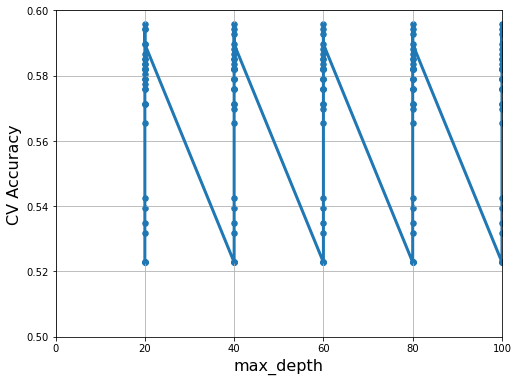

In [6]:
max_features = rf_cv.cv_results_['param_max_depth'].data
accuracy_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, accuracy_scores, s=30)
plt.plot(max_features, accuracy_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 100])
plt.ylim([0.5, 0.6])

Depth doesn't change the score from above.

(0.5, 0.6)

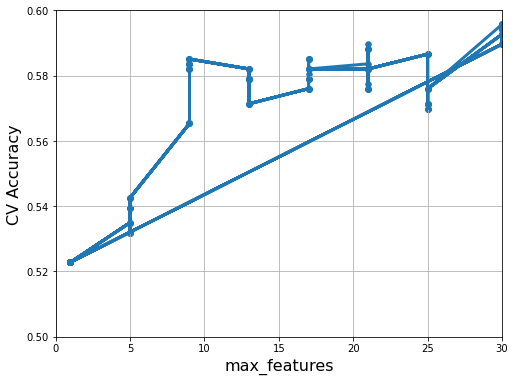

In [7]:
max_features = rf_cv.cv_results_['param_max_features'].data
accuracy_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, accuracy_scores, s=30)
plt.plot(max_features, accuracy_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 30])
plt.ylim([0.5, 0.6])

Feature does change the score. 17 is the max.

(0.5, 0.6)

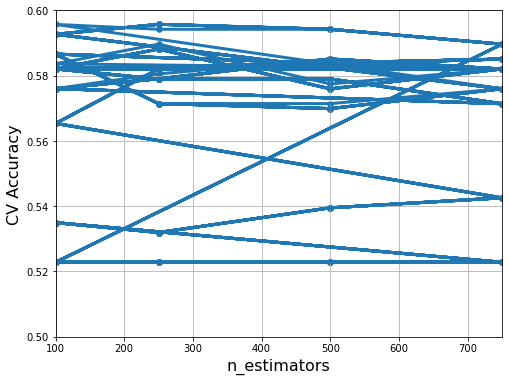

In [8]:
max_features = rf_cv.cv_results_['param_n_estimators'].data
accuracy_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('n_estimators', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, accuracy_scores, s=30)
plt.plot(max_features, accuracy_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([100, 750])
plt.ylim([0.5, 0.6])

Max is at 500 features.

In [9]:
grid_values = {'max_features': np.linspace(5,20,20, dtype='int32'),
               'max_depth': [20],
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [404]}

rf2 = RandomForestClassifier() 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='accuracy', cv=5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20],
                         'max_features': array([ 5,  5,  6,  7,  8,  8,  9, 10, 11, 12, 12, 13, 14, 15, 16, 16, 17,
       18, 19, 20]),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [404]},
             scoring='accuracy')

(0.5, 0.6)

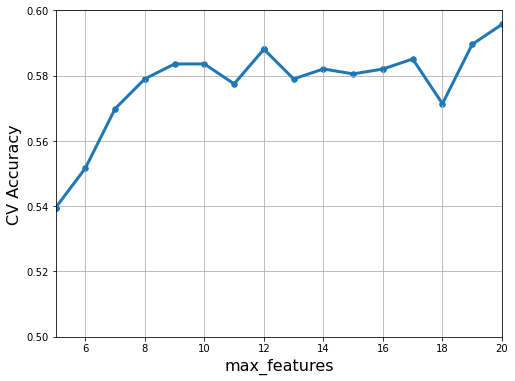

In [10]:
max_features = rf_cv.cv_results_['param_max_features'].data
accuracy_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, accuracy_scores, s=30)
plt.plot(max_features, accuracy_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([5, 20])
plt.ylim([0.5, 0.6])

In [5]:
rf = RandomForestClassifier(random_state = 404, n_estimators = 500, max_features = 20, max_depth = 20)
rf.fit(X_train_orig, y_train_orig)

RandomForestClassifier(max_depth=20, max_features=20, n_estimators=500,
                       random_state=404)

In [6]:
y_pred = rf.predict(Xtest)
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(ytest, y_pred))

Confusion Matrix: 
 [[65 54]
 [37 80]]

Accuracy: 0.614406779661017


# Binning according to rating (RF)

Creating the bins by changing the results to categories -- This is done by converting the overalls to categories.

In [7]:
def multi_bin(dataset):
    solution = np.zeros([(len(dataset)), 11])
    for i, j in enumerate(dataset):
        solution[i][int(j*2)] = 1
    return solution

In [8]:
y_multitrain = multi_bin(train['overall_ratings'].values)
y_multitest = multi_bin(test['overall_ratings'].values)

In [9]:
y_multitrain[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [10]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_train_orig, y_multitrain,
                                                                            test_size=0.3, random_state=404)
X_train.shape, X_test.shape

((658, 162), (282, 162))

In [17]:
grid_values = {'max_features': np.linspace(1,30,8, dtype='int32'),
               'max_depth': np.linspace(20,100,5, dtype='int32'),
               'min_samples_leaf': [5, 10, 15],
               'n_estimators': [500],
               'random_state': [404]}

rf_multi = RandomForestClassifier() 
rf_cv_multi = GridSearchCV(rf_multi, param_grid=grid_values, scoring='accuracy', cv=5)
rf_cv_multi.fit(X_train, y_train_multi)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 20,  40,  60,  80, 100]),
                         'max_features': array([ 1,  5,  9, 13, 17, 21, 25, 30]),
                         'min_samples_leaf': [5, 10, 15], 'n_estimators': [500],
                         'random_state': [404]},
             scoring='accuracy')

(0.1, 0.3)

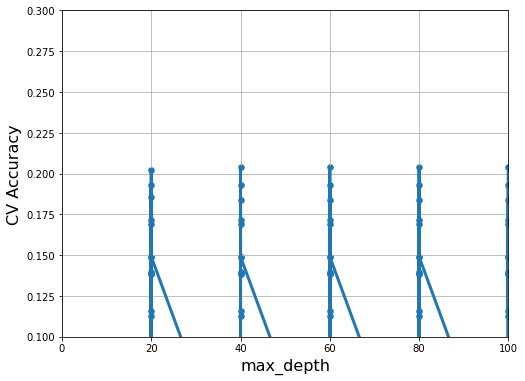

In [18]:
max_features = rf_cv_multi.cv_results_['param_max_depth'].data
accuracy_scores = rf_cv_multi.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, accuracy_scores, s=30)
plt.plot(max_features, accuracy_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 100])
plt.ylim([0.1, 0.3])

(0.1, 0.3)

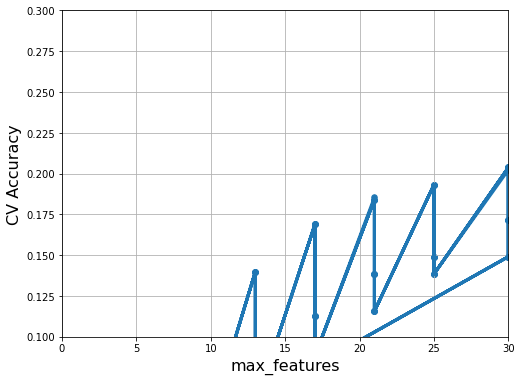

In [19]:
max_features = rf_cv_multi.cv_results_['param_max_features'].data
accuracy_scores = rf_cv_multi.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, accuracy_scores, s=30)
plt.plot(max_features, accuracy_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 30])
plt.ylim([0.1, 0.3])

In [12]:
rf_multi = RandomForestClassifier(random_state = 404, n_estimators = 500, max_features = 30, max_depth = 20)
rf_multi.fit(X_train_orig, y_multitrain)

RandomForestClassifier(max_depth=20, max_features=30, n_estimators=500,
                       random_state=404)

In [13]:
y_pred = rf_multi.predict(Xtest)
counter = 0
for i, j in enumerate(y_pred):
    if sum(y_pred[i]) < 1:
        y_pred[i] = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
        counter += 1
print('proportion of all 0s', counter/len(y_pred))
#cm = confusion_matrix(y_multitest, y_pred)
#print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_multitest, y_pred))

proportion of all 0s 0.3983050847457627

Accuracy: 0.4915254237288136


# Switching to regression

In [14]:
rf_regression = RandomForestRegressor(random_state = 404, n_estimators = 500, max_features = 30, max_depth = 20)
rf_regression.fit(X_train_orig, train['overall_ratings'])

RandomForestRegressor(max_depth=20, max_features=30, n_estimators=500,
                      random_state=404)

In [16]:
y_pred = rf_regression.predict(Xtest)

In [17]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [20]:
OSR2(rf_regression, Xtest, test['overall_ratings'], train['overall_ratings'])

-0.08700617491859464

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(test['overall_ratings'], y_pred)
mae = mean_absolute_error(test['overall_ratings'], y_pred)
print('mean squared error:', mse)
print('mean abosolute error:', mae)

mean squared error: 0.17477285050004376
mean abosolute error: 0.3364851138724896


In [56]:
def convert_to_bins(results):
    predict = np.zeros((len(results), 11))
    bins = (y_pred/.5).round()
    for i,j in enumerate(bins):
        predict[i, int(j)] = 1
    return predict

In [59]:
converted = convert_to_bins(y_pred)

In [60]:
print ("\nAccuracy:", accuracy_score(y_multitest, converted))


Accuracy: 0.4364406779661017


# Boosting CART